#### INFO 3440 - Project Summary
#### Winter 2023
#### Angel Fernandes

In [1359]:
import pandas as pd
import pyomo.environ as pe
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#### Data

In [1360]:
# Draftkings Salary Data 
DKSalariesDF = pd.read_csv('DKSalaries11Feb2023.csv')
DKSalariesDF[:5]

,Position,Name + ID,Name,ID,Roster Position,Salary,Game Info,TeamAbbrev,AvgPointsPerGame
0,C,Jack Hughes (26671762),Jack Hughes,26671762,C/UTIL,8700,NJ@MIN 02/11/2023 08:00PM ET,NJ,18.16
1,C,Auston Matthews (26671764),Auston Matthews,26671764,C/UTIL,8600,CLS@TOR 02/11/2023 07:00PM ET,TOR,17.51
2,G,Connor Hellebuyck (26672442),Connor Hellebuyck,26672442,G,8500,CHI@WPG 02/11/2023 10:00PM ET,WPG,16.51
3,G,Ilya Samsonov (26672443),Ilya Samsonov,26672443,G,8400,CLS@TOR 02/11/2023 07:00PM ET,TOR,14.91
4,G,David Rittich (26672444),David Rittich,26672444,G,8300,CHI@WPG 02/11/2023 10:00PM ET,WPG,12.22


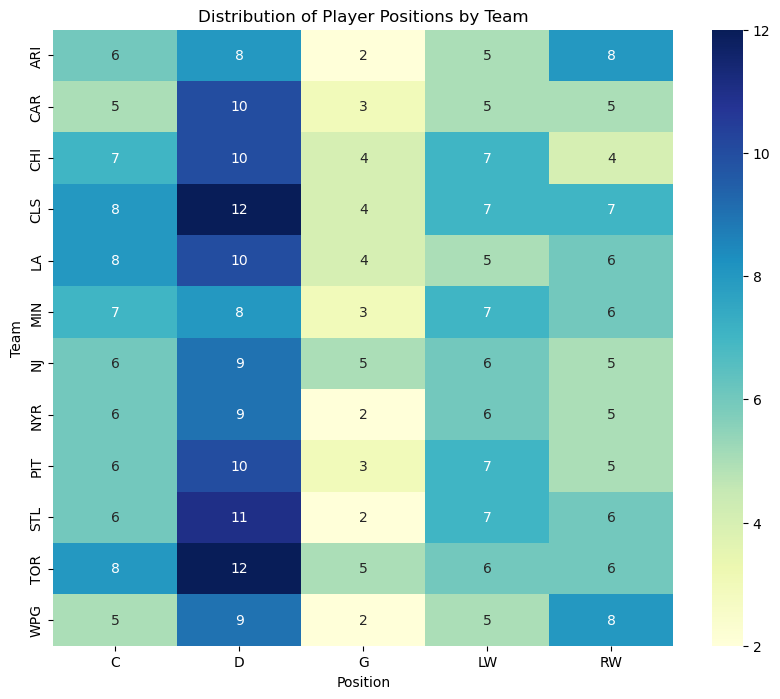

In [1361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
table = pd.pivot_table(DKSalariesDF, values='Name', index=['TeamAbbrev'], columns=['Position'], aggfunc=len, fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Distribution of Player Positions by Team')
plt.xlabel('Position')
plt.ylabel('Team')
plt.show()

#### The heatmap helps to understand the distribution of player positions in each team. This will help in identifying the teams with strong defense or offense positions. WGP and ARI seems to have a very similar distribution of players.

In [1362]:
# Skaters Actual Performance Data  
skaters_actualDF = pd.read_csv('SkatersActual11Feb2023.csv')
skaters_actualDF = skaters_actualDF.iloc[:, 0:37]
skaters_actualDF['Name'] = skaters_actualDF['Name'].str.replace('ä', 'a').str.replace('ö', 'o')
skaters_actualDF = skaters_actualDF.loc[skaters_actualDF['Pos'] != 'G']
skaters_actualDF[:5]

,Name,Team,Pos,GP,G,A,P,PIM,X,TOIGP,...,GWP,OTP,PPPPCT,GGP,AGP,PGP,SHOTS,SHPCT,HITS,BS
0,Artemi Panarin,NYR,F,1,4,1,5,2,4.0,15:31,...,1,0,20.00%,4,1,5,5.0,80.00%,0.0,0.0
1,Adrian Kempe,LAK,F,1,4,0,4,2,2.0,17:45,...,0,0,50.00%,4,0,4,7.0,57.10%,1.0,0.0
2,Nick Schmaltz,ARI,F,1,1,3,4,0,2.0,18:36,...,0,0,50.00%,1,3,4,2.0,50.00%,1.0,0.0
3,Dillon Dube,CGY,F,1,1,3,4,0,2.0,16:06,...,1,0,25.00%,1,3,4,3.0,33.30%,1.0,1.0
4,Juuso Valimaki,ARI,D,1,0,4,4,2,0.0,21:52,...,0,0,50.00%,0,4,4,1.0,0.00%,0.0,3.0


In [1363]:
# Goalies Actual Performance Data
goalies_actualDF = pd.read_csv('GoaliesActual11Feb2023.csv')
goalies_actualDF = goalies_actualDF.iloc[:, 0:16]
goalies_actualDF['Name'] = goalies_actualDF['Name'].str.replace('ä', 'a').str.replace('ö', 'o')
goalies_actualDF[:5]

,Name,Team,GP,GAA,SVPCT,W,L,OTL,GA,SV,SOG,SO,TOI,G,A,P
0,Jaroslav Halak,NYR,1,2.01,0.931,1,0,0,2,27,29,0,59:50:00,0,0,0
1,Jacob Markstrom,CGY,1,2.00,0.913,1,0,0,2,21,23,0,60:00:00,0,1,1
2,Darcy Kuemper,WSH,1,1.00,0.964,1,0,0,1,27,28,0,60:00:00,0,0,0
3,Jordan Binnington,STL,1,4.92,0.821,1,0,0,5,23,28,0,61:02:00,0,0,0
4,Jack Campbell,EDM,1,3.01,0.897,1,0,0,3,26,29,0,59:43:00,0,0,0


In [1364]:
# Skaters Season Long Data
skatersDF = pd.read_csv('SkatersSeason2022-2023.csv')
skatersDF = skatersDF.iloc[:, 0:37]
skatersDF = skatersDF.loc[skatersDF['Pos'] != 'G']
skatersDF[:5]

,Name,Team,Pos,GP,G,A,P,PIM,X,TOIGP,...,GWP,OTP,PPPPCT,GGP,AGP,PGP,SHOTS,SHPCT,HITS,BS
0,Connor McDavid,EDM,W,52,41,53,94,20,6.0,22:39,...,17,2,50.00%,0.788,1.019,1.808,217.0,18.90%,47.0,30.0
1,Leon Draisaitl,EDM,W,50,29,47,76,20,2.0,21:56,...,17,2,47.40%,0.580,0.940,1.520,148.0,19.60%,34.0,30.0
2,Nikita Kucherov,TBL,W,51,20,56,76,28,4.0,20:28,...,15,1,40.80%,0.392,1.098,1.490,171.0,11.70%,40.0,20.0
3,David Pastrnak,BOS,W,51,38,34,72,32,25.0,19:43,...,14,2,38.90%,0.745,0.667,1.412,245.0,15.50%,59.0,17.0
4,Matthew Tkachuk,FLA,W,51,27,44,71,74,15.0,20:16,...,9,0,35.20%,0.529,0.863,1.392,197.0,13.70%,34.0,24.0


In [1365]:
# Goalie Season Long Data
goaliesDF = pd.read_csv('GoaliesSeason2022-2023.csv')
goaliesDF = goaliesDF.iloc[:, 0:16]
goaliesDF[:5]

,Name,Team,GP,GAA,SVPCT,W,L,GA,SV,SOG,SO,TOI,G,A,P,PIM
0,Connor Hellebuyck,WPG,40,2.45,0.923,24,15,97,1164,1261,3,2378:00,0,0,0,0
1,Jake Oettinger,DAL,40,2.22,0.926,23,7,86,1069,1155,4,2329:09,0,1,1,2
2,Ilya Sorokin,NYI,40,2.41,0.923,17,17,92,1098,1190,4,2287:58,0,0,0,0
3,Carter Hart,PHI,39,2.80,0.913,16,15,105,1103,1208,1,2246:03,0,0,0,0
4,Jordan Binnington,STL,39,3.27,0.892,18,18,122,1008,1130,2,2237:48,0,1,1,10


### Optimization Problem 1: Historical Data

In [1366]:
#Merging data
merged_data1 = pd.merge(DKSalariesDF,skatersDF, on=["Name"], how='inner')
merged_data1 = merged_data1.drop(['Name + ID', 'TeamAbbrev'], axis=1)
merged_data1 = merged_data1.fillna(0)
merged_data1 = merged_data1.assign(cost_effectiveness = merged_data1['Salary'] / merged_data1['AvgPointsPerGame'])
merged_data1[:5]

,Position,Name,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,Pos,GP,...,OTP,PPPPCT,GGP,AGP,PGP,SHOTS,SHPCT,HITS,BS,cost_effectiveness
0,C,Jack Hughes,26671762,C/UTIL,8700,NJ@MIN 02/11/2023 08:00PM ET,18.16,NJD,C,50,...,7,29.90%,0.700,0.640,1.340,229.0,15.30%,11.0,13.0,479.074890
1,C,Auston Matthews,26671764,C/UTIL,8600,CLS@TOR 02/11/2023 07:00PM ET,17.51,TOR,C,47,...,1,34.00%,0.532,0.596,1.128,200.0,12.50%,60.0,63.0,491.147915
2,LW,Kirill Kaprizov,26671918,W/UTIL,7800,NJ@MIN 02/11/2023 08:00PM ET,15.70,MIN,W,51,...,1,46.80%,0.569,0.647,1.216,191.0,15.20%,49.0,18.0,496.815287
3,LW,Kyle Connor,26671920,W/UTIL,7700,CHI@WPG 02/11/2023 10:00PM ET,14.09,WPG,W,52,...,2,33.90%,0.462,0.673,1.135,178.0,13.50%,32.0,16.0,546.486870
4,C,Sidney Crosby,26671766,C/UTIL,7600,PIT@LA 02/11/2023 10:30PM ET,13.68,PIT,C,51,...,3,27.40%,0.471,0.745,1.216,146.0,16.40%,51.0,27.0,555.555556


In [1367]:
#Merging data
merged_data2 = pd.merge(DKSalariesDF, goaliesDF, on=["Name"], how='inner')
merged_data2 = merged_data2.drop(['Name + ID', 'TeamAbbrev'], axis=1)
merged_data2 = merged_data2.fillna(0)
merged_data2 = merged_data2.assign(cost_effectiveness = merged_data2['Salary'] / merged_data2['AvgPointsPerGame'])
merged_data2['cost_effectiveness'] = merged_data2['cost_effectiveness'].round(decimals=2)
merged_data2[:5]

,Position,Name,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,GP,GAA,...,GA,SV,SOG,SO,TOI,G,A,P,PIM,cost_effectiveness
0,G,Connor Hellebuyck,26672442,G,8500,CHI@WPG 02/11/2023 10:00PM ET,16.51,WPG,40,2.45,...,97,1164,1261,3,2378:00,0,0,0,0,514.84
1,G,Ilya Samsonov,26672443,G,8400,CLS@TOR 02/11/2023 07:00PM ET,14.91,TOR,25,2.39,...,59,642,701,3,1483:42,0,2,2,0,563.38
2,G,David Rittich,26672444,G,8300,CHI@WPG 02/11/2023 10:00PM ET,12.22,WPG,13,2.58,...,31,309,340,0,722:02,0,0,0,2,679.21
3,G,Frederik Andersen,26672445,G,8200,NYR@CAR 02/11/2023 07:00PM ET,11.73,CAR,15,2.48,...,36,337,373,0,869:30,0,0,0,0,699.06
4,G,Antti Raanta,26672446,G,8200,NYR@CAR 02/11/2023 07:00PM ET,11.95,CAR,19,2.46,...,46,423,469,2,1119:45,0,0,0,0,686.19


In [1368]:
values = skatersDF['Team'].unique()
print(values)

['EDM' 'TBL' 'BOS' 'FLA' 'SJS' 'DAL' 'BUF' 'NJD' 'VAN' 'MIN' 'PIT' 'TOR'
 'COL' 'WPG' 'NYI' 'WSH' 'NYR' 'LAK' 'OTT' 'PHI' 'CBJ' 'STL' 'CAR' 'CGY'
 'VGK' 'ARI' 'DET' 'ANA' 'NSH' 'MTL' 'SEA' 'CHI']


In [1369]:
values = goaliesDF['Team'].unique()
print(values)

['WPG' 'DAL' 'NYI' 'PHI' 'STL' 'NYR' 'TBL' 'NSH' 'SEA' 'ARI' 'VGK' 'DET'
 'ANA' 'COL' 'CGY' 'WSH' 'BOS' 'MIN' 'NJD' 'FLA' 'MTL' 'EDM' 'SJS' 'VAN'
 'OTT' 'PIT' 'LAK' 'TOR' 'CBJ' 'CHI' 'BUF' 'CAR']


In [1370]:
values = merged_data1['Name'].sort_values()
print(values)

237          Adam Beckman
103          Adam Boqvist
16               Adam Fox
146            Adam Lowry
41           Adrian Kempe
              ...        
128       Yegor Chinakhov
124    Yegor Sharangovich
204             Zac Jones
184      Zach Aston-Reese
212          Zack Kassian
Name: Name, Length: 284, dtype: object


In [1371]:
values = merged_data2['Name'].sort_values()
print(values)

25         Akira Schmid
26         Alex Stalock
4          Antti Raanta
27         Cal Petersen
12        Casey DeSmith
0     Connor Hellebuyck
15        Connor Ingram
22       Daniil Tarasov
2         David Rittich
13      Dustin Tokarski
21     Elvis Merzlikins
9      Filip Gustavsson
3     Frederik Andersen
16      Igor Shesterkin
1         Ilya Samsonov
18       Jaroslav Halak
20       Jaxson Stauber
10       Jonathan Quick
17     Joonas Korpisalo
5     Jordan Binnington
14       Karel Vejmelka
8     Marc-Andre Fleury
23          Matt Murray
19          Petr Mrazek
7        Pheonix Copley
24      Pyotr Kochetkov
6         Thomas Greiss
28        Tristan Jarry
11        Vitek Vanecek
Name: Name, dtype: object


In [1372]:
merge_goalies_skaters = pd.concat([merged_data1, merged_data2])
merge_goalies_skaters = merge_goalies_skaters.fillna(0)
merged_data2['cost_effectiveness'] = merged_data2['cost_effectiveness'].round(decimals=2)
merge_goalies_skaters[:5]

,Position,Name,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,Pos,GP,...,cost_effectiveness,GAA,SVPCT,W,L,GA,SV,SOG,SO,TOI
0,C,Jack Hughes,26671762,C/UTIL,8700,NJ@MIN 02/11/2023 08:00PM ET,18.16,NJD,C,50,...,479.074890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,C,Auston Matthews,26671764,C/UTIL,8600,CLS@TOR 02/11/2023 07:00PM ET,17.51,TOR,C,47,...,491.147915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,LW,Kirill Kaprizov,26671918,W/UTIL,7800,NJ@MIN 02/11/2023 08:00PM ET,15.70,MIN,W,51,...,496.815287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,LW,Kyle Connor,26671920,W/UTIL,7700,CHI@WPG 02/11/2023 10:00PM ET,14.09,WPG,W,52,...,546.486870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,C,Sidney Crosby,26671766,C/UTIL,7600,PIT@LA 02/11/2023 10:30PM ET,13.68,PIT,C,51,...,555.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [1373]:
merge_goalies_skaters.columns

Index(['Position', 'Name', 'ID', 'Roster Position', 'Salary', 'Game Info',
       'AvgPointsPerGame', 'Team', 'Pos', 'GP', 'G', 'A', 'P', 'PIM', 'X',
       'TOIGP', 'TOIES', 'TOIPP', 'TOISH', 'ESG', 'PPG', 'SHG', 'GWG', 'OTG',
       'SHOUTG', 'ESA', 'PPA', 'SHA', 'GWA', 'OTA', 'ESP', 'PPP', 'SHP', 'GWP',
       'OTP', 'PPPPCT', 'GGP', 'AGP', 'PGP', 'SHOTS', 'SHPCT', 'HITS', 'BS',
       'cost_effectiveness', 'GAA', 'SVPCT', 'W', 'L', 'GA', 'SV', 'SOG', 'SO',
       'TOI'],
      dtype='object')

In [1374]:
teams = merge_goalies_skaters.groupby('Team')

In [1375]:
merge_goalies_skaters.set_index('Name', inplace=True)
merged_data2['cost_effectiveness'] = merged_data2['cost_effectiveness'].round(decimals=2)
merge_goalies_skaters[:5]

,Position,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,Pos,GP,G,...,cost_effectiveness,GAA,SVPCT,W,L,GA,SV,SOG,SO,TOI
Name,,,,,,,,,,,,,,,,,,,,,
Jack Hughes,C,26671762,C/UTIL,8700,NJ@MIN 02/11/2023 08:00PM ET,18.16,NJD,C,50,35,...,479.074890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Auston Matthews,C,26671764,C/UTIL,8600,CLS@TOR 02/11/2023 07:00PM ET,17.51,TOR,C,47,25,...,491.147915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Kirill Kaprizov,LW,26671918,W/UTIL,7800,NJ@MIN 02/11/2023 08:00PM ET,15.70,MIN,W,51,29,...,496.815287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Kyle Connor,LW,26671920,W/UTIL,7700,CHI@WPG 02/11/2023 10:00PM ET,14.09,WPG,W,52,24,...,546.486870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Sidney Crosby,C,26671766,C/UTIL,7600,PIT@LA 02/11/2023 10:30PM ET,13.68,PIT,C,51,24,...,555.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [1376]:
a = merge_goalies_skaters['cost_effectiveness'].mean()
print(a)

inf


In [1377]:
players = {'Goal': [8.5], 'Assist': [5], 'Shot on Goal': [1.5], 'Blocked Shot': [1.3], 'Short Handed Point Bonues (Goal/Assist)': [2], 'Shootout Goal': [1.5], 'Hat Trick Bonus': [3], '5+ Shots': [3], '3+ Blocked Shots': [3], '3+ Points': [3]}
goalies = {'Win': [6], 'Save': [0.7], 'Goal Against': [-3.5], 'Shutout Bonus': [4], 'Overtime Loss': [2], '35+ Saves': [3]}
DKPlayersScoring = pd.DataFrame(players)
DKPlayersScoring = DKPlayersScoring.transpose()#.reset_index()
DKPlayersScoring.rename(columns={'index': 'Players', 0: 'Score'}, inplace=True)
DKGoaliesScoring = pd.DataFrame(goalies)
DKGoaliesScoring = DKGoaliesScoring.transpose()#.reset_index()
DKGoaliesScoring.rename(columns={'index': 'Goalies', 0: 'Score'}, inplace=True)
DKPlayersScoring

,Score
Goal,8.5
Assist,5.0
Shot on Goal,1.5
Blocked Shot,1.3
Short Handed Point Bonues (Goal/Assist),2.0
Shootout Goal,1.5
Hat Trick Bonus,3.0
5+ Shots,3.0
3+ Blocked Shots,3.0
3+ Points,3.0


In [1378]:
DKGoaliesScoring

,Score
Win,6.0
Save,0.7
Goal Against,-3.5
Shutout Bonus,4.0
Overtime Loss,2.0
35+ Saves,3.0


#### Objectives

In [1379]:
model = pe.ConcreteModel()
model.players = pe.Var(merge_goalies_skaters.index, within=pe.Binary)

model.obj = pe.Objective(
    expr=sum(model.players[i] * merge_goalies_skaters.loc[i, 'AvgPointsPerGame'] for i in merge_goalies_skaters.index),
    sense=pe.maximize
)
model.players.pprint()

players : Size=313, Index=players_index
    Key                     : Lower : Value : Upper : Fixed : Stale : Domain
               Adam Beckman :     0 :  None :     1 : False :  True : Binary
               Adam Boqvist :     0 :  None :     1 : False :  True : Binary
                   Adam Fox :     0 :  None :     1 : False :  True : Binary
                 Adam Lowry :     0 :  None :     1 : False :  True : Binary
               Adrian Kempe :     0 :  None :     1 : False :  True : Binary
               Akira Schmid :     0 :  None :     1 : False :  True : Binary
                Alec Regula :     0 :  None :     1 : False :  True : Binary
             Alex Goligoski :     0 :  None :     1 : False :  True : Binary
               Alex Iafallo :     0 :  None :     1 : False :  True : Binary
               Alex Stalock :     0 :  None :     1 : False :  True : Binary
              Alex Turcotte :     0 :  None :     1 : False :  True : Binary
            Alexander Edler :     0 

#### Constraints

In [1380]:
model.con_players = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index) == 9)
model.con_salary = pe.Constraint(expr=sum(model.players[i] * merge_goalies_skaters['Salary'][i] for i in merge_goalies_skaters.index) <= 50000)
model.con_teams = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if any(merge_goalies_skaters.loc[i, 'Team'] == team for team in teams.groups.keys())) >= 3)
model.con_c = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'C' in merge_goalies_skaters['Position'][i]) == 2)
model.con_w = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'LW' in merge_goalies_skaters['Position'][i] or 'RW' in merge_goalies_skaters['Position'][i]) >= 3)
model.con_d = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'D' in merge_goalies_skaters['Position'][i]) == 2)
model.con_u = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'C' in merge_goalies_skaters['Position'][i] or 'LW' in merge_goalies_skaters['Position'][i] or 'RW' in merge_goalies_skaters['Position'][i] or 'D' in merge_goalies_skaters['Position'][i]) >= 1)
model.con_g = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'G' in merge_goalies_skaters['Position'][i]) == 1)

#### Objective Value

In [1381]:
opt = pe.SolverFactory('glpk')
result = opt.solve(model)
print(result.solver.status, result.solver.termination_condition)

ok optimal


In [1382]:
model.display()

Model unknown

  Variables:
    players : Size=313, Index=players_index
        Key                     : Lower : Value : Upper : Fixed : Stale : Domain
                   Adam Beckman :     0 :   0.0 :     1 : False : False : Binary
                   Adam Boqvist :     0 :   0.0 :     1 : False : False : Binary
                       Adam Fox :     0 :   0.0 :     1 : False : False : Binary
                     Adam Lowry :     0 :   0.0 :     1 : False : False : Binary
                   Adrian Kempe :     0 :   0.0 :     1 : False : False : Binary
                   Akira Schmid :     0 :   0.0 :     1 : False : False : Binary
                    Alec Regula :     0 :   0.0 :     1 : False : False : Binary
                 Alex Goligoski :     0 :   0.0 :     1 : False : False : Binary
                   Alex Iafallo :     0 :   0.0 :     1 : False : False : Binary
                   Alex Stalock :     0 :   0.0 :     1 : False : False : Binary
                  Alex Turcotte :    

In [1383]:
obj_val = model.obj.expr()
print(f'optimal objective value = {obj_val:.2f}')

optimal objective value = 119.46


In [1384]:
#players selected from the roster
index=[]
for i in model.players:
    if model.players[i].value==1.0:
        index.append(i)
index

['Ty Smith',
 'Jaxson Stauber',
 'Vladimir Tarasenko',
 'Lukas Reichel',
 'Auston Matthews',
 'Jack Hughes',
 'Martin Necas',
 'Jacob Moverare',
 'Kirill Kaprizov']

### This is my lineup based on Historical Data

In [1385]:
new_merge_gs = merge_goalies_skaters.loc[index]
new_merge_gs

,Position,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,Pos,GP,G,...,cost_effectiveness,GAA,SVPCT,W,L,GA,SV,SOG,SO,TOI
Name,,,,,,,,,,,,,,,,,,,,,
Ty Smith,D,26672428,D/UTIL,2500,PIT@LA 02/11/2023 10:30PM ET,8.02,PIT,D,9,1,...,311.720698,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0
Jaxson Stauber,G,26672464,G,6900,CHI@WPG 02/11/2023 10:00PM ET,17.90,CHI,0,3,0,...,385.470000,2.29,0.925,3.0,0.0,7.0,86.0,93.0,0.0,183:30
Vladimir Tarasenko,RW,26671980,W/UTIL,4500,NYR@CAR 02/11/2023 07:00PM ET,10.30,NYR,W,39,11,...,436.893204,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0
Lukas Reichel,LW,26672096,W/UTIL,2500,CHI@WPG 02/11/2023 10:00PM ET,9.78,CHI,W,4,1,...,255.623722,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0
Auston Matthews,C,26671764,C/UTIL,8600,CLS@TOR 02/11/2023 07:00PM ET,17.51,TOR,C,47,25,...,491.147915,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0
Jack Hughes,C,26671762,C/UTIL,8700,NJ@MIN 02/11/2023 08:00PM ET,18.16,NJD,C,50,35,...,479.074890,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0
Martin Necas,RW,26671956,W/UTIL,5700,NYR@CAR 02/11/2023 07:00PM ET,11.99,CAR,W,51,21,...,475.396163,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0
Jacob Moverare,D,26672414,D/UTIL,2500,PIT@LA 02/11/2023 10:30PM ET,10.10,LAK,D,2,0,...,247.524752,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0
Kirill Kaprizov,LW,26671918,W/UTIL,7800,NJ@MIN 02/11/2023 08:00PM ET,15.70,MIN,W,51,29,...,496.815287,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0


#### The above is my optimized lineup based on Average Points per Game and then Cost Effectiveness is looked at to make sure I achieve maximum optimal value. This lineup fulfilled all constraints with a maximum total salary of 49700.0 out 50000.0 and a maximum optimal value of 119.46. Players have been selected from PIT, CHI, NYR, TOR, NJD, CAR, LAK and MIN fulfilling the requirement that players selected must be from atleast 3 teams. All players seem to have a great Average Points per Game. The average points per game for the team is 13.273

In [1386]:
unique_teams = new_merge_gs['Team'].unique()
print(unique_teams)

['PIT' 'CHI' 'NYR' 'TOR' 'NJD' 'CAR' 'LAK' 'MIN']


In [1387]:
average = new_merge_gs['AvgPointsPerGame'].mean()
average

13.273333333333333

#### In the NHL, cost effectiveness is a crucial approach since it enables clubs to get the most out of their limited resources. NHL clubs must make effective use of their resources since the salary cap places a ceiling on the amount of money they can spend on player wages. 

#### Teams can utilize undervalued individuals who can make substantial contributions to the squad as a means to leverage cost-effectiveness as a tactic. Although they might not attract huge pay, these athletes can deliver exceptional value for the money. By investing in player development programs that can assist them in finding and developing outstanding players at a reduced cost, teams can also employ cost-effectiveness as a strategy.

#### Teams may also use cost effectiveness as a strategy by concentrating on their overall playing style. For instance, a team that plays a fast-paced, offensive game may profit from investing in quick, talented players who can open up scoring possibilities, whereas a team that plays a more defensive style may give priority to players with good defensive skills. 

#### In order to develop competitive, successful teams while operating within the restrictions of the salary limit, NHL teams must, overall, take cost-effectiveness into account.

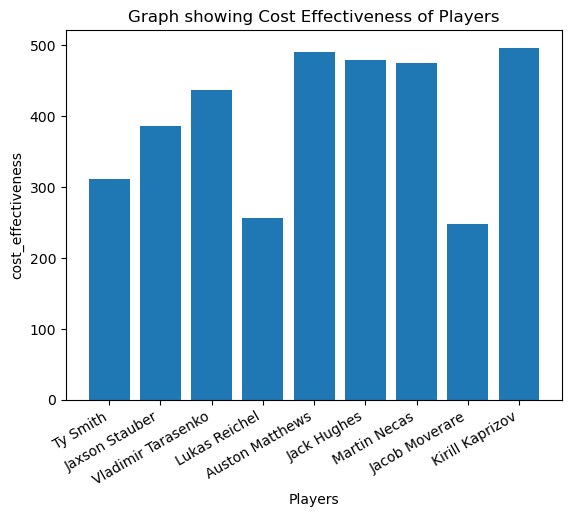

In [1388]:
import matplotlib.pyplot as plt
plt.bar(index, new_merge_gs['cost_effectiveness'])
plt.title('Graph showing Cost Effectiveness of Players')
plt.xlabel('Players')
plt.ylabel('cost_effectiveness')
plt.xticks(rotation=30, ha='right')
plt.show()

#### The bar chart helps analyze the cost effectiveness of the new team.

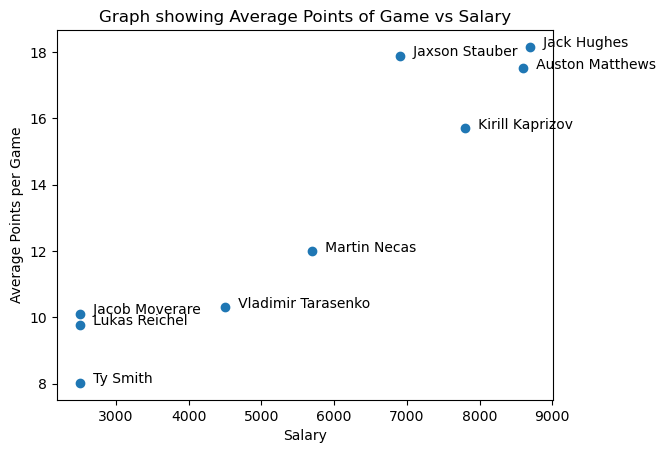

In [1389]:
import matplotlib.pyplot as plt
plt.scatter(new_merge_gs['Salary'], new_merge_gs['AvgPointsPerGame'])
for i, row in new_merge_gs.iterrows():
    plt.annotate('   '+i, (row['Salary'], row['AvgPointsPerGame']))
plt.title('Graph showing Average Points of Game vs Salary')
plt.xlabel('Salary')
plt.ylabel('Average Points per Game')
plt.show()

#### The scatter plot helps understand the relationship between player salaries and their average points per game. This will help in identifying the overpaid and underpaid players in the team. Ty Smith is underpaid and Jack Hughes is overpaid.

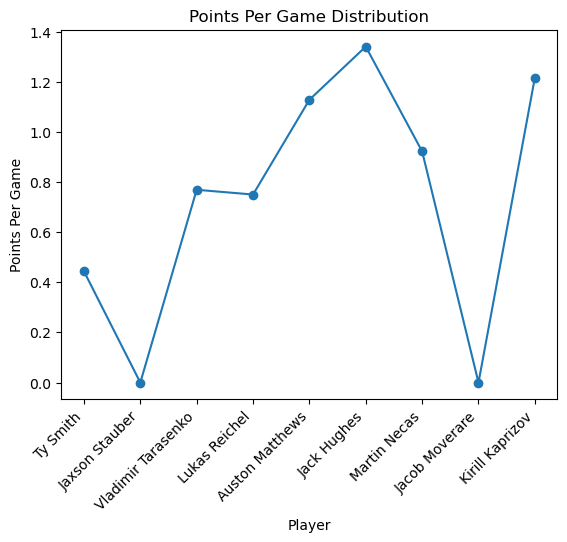

In [1390]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(new_merge_gs.index, new_merge_gs['PGP'], marker="o")
plt.xlabel("Player")
plt.ylabel("Points Per Game")
plt.title("Points Per Game Distribution")
plt.xticks(rotation=45,ha='right')
plt.show()

#### The line chart helps understand the point per game distribution of the players in the team. This will help in identifying the top-performing players in the team. Top performing player is Jack Hughes while low performing players are Jaxson Stauber and Jacob Moverare

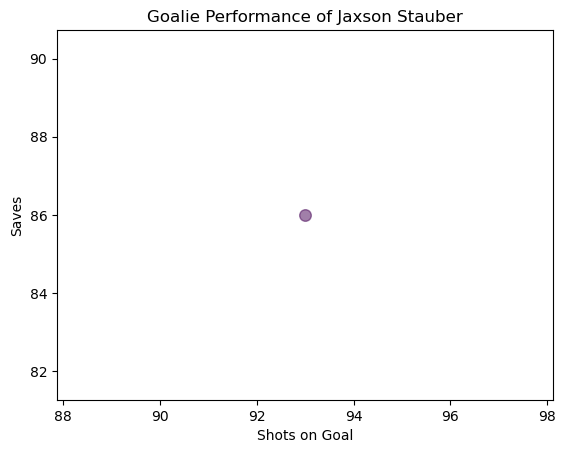

In [1391]:
import matplotlib.pyplot as plt
import pandas as pd

df = new_merge_gs.loc['Jaxson Stauber']
x = df['SOG']
y = df['SV']
bubble_size = df['GA']
colors = df['W']
plt.scatter(x, y, s=bubble_size*10, c=colors, alpha=0.5)
plt.xlabel('Shots on Goal')
plt.ylabel('Saves')
plt.title('Goalie Performance of Jaxson Stauber')
plt.show()

#### The bubble chart helps understand the performance of goalies. This will help in identifying the best performing goalies for the team. The size of the buble depends on the Goals scored by the goalie. With Jaxson Stauber scoring 7 Goals, the bubble looks relatively smaller on the chart. That being said, he seems to have a good Saves to Shots on Goal ratio.

/var/folders/47/bsztlgbn17gc7z69qbc6m59m0000gn/T/ipykernel_46035/970609463.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=30, ha='right')


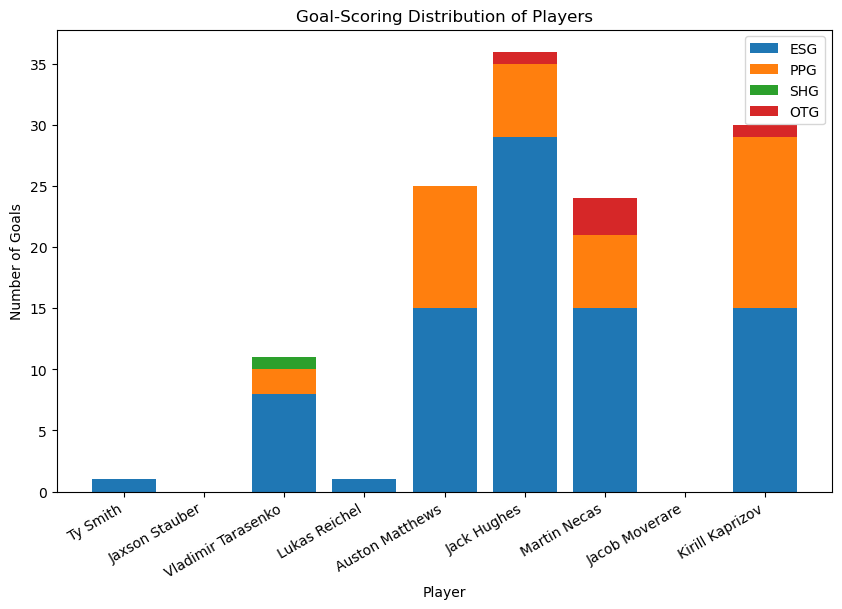

In [1392]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = new_merge_gs

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df.index, df['ESG'], label='ESG')
ax.bar(df.index, df['PPG'], bottom=df['ESG'], label='PPG')
ax.bar(df.index, df['SHG'], bottom=df['ESG']+df['PPG'], label='SHG')
ax.bar(df.index, df['OTG'], bottom=df['ESG']+df['PPG']+df['SHG'], label='OTG')

# Set labels and title
ax.set_xlabel('Player')
ax.set_ylabel('Number of Goals')
ax.set_title('Goal-Scoring Distribution of Players')
ax.set_xticklabels(df.index, rotation=30, ha='right')
ax.legend()

plt.show()

#### The stacked bar chart helps understand the goal-scoring distribution of the players in the team. This will help in identifying the players with the most goals and their scoring patterns. In the above graph, Jaxson Stauber is a Goalie and Jacob Moverare is a Defense. The graph is based on Even Strength Goals, power play goals, shorthanded goals and overtime (non-shootout) goals. Jack Huges is the best performer. Jaxson and Jacob didnt score goals.

### Optimization Problem 2: Actual Data

In [1393]:
#Merging data
merged_data1 = pd.merge(DKSalariesDF,skaters_actualDF, on=["Name"], how='inner')
merged_data1 = merged_data1.drop(['Name + ID', 'TeamAbbrev'], axis=1)
merged_data1 = merged_data1.fillna(0)
merged_data1 = merged_data1.assign(cost_effectiveness = merged_data1['Salary'] / merged_data1['AvgPointsPerGame'])
merged_data1[:5]

,Position,Name,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,Pos,GP,...,OTP,PPPPCT,GGP,AGP,PGP,SHOTS,SHPCT,HITS,BS,cost_effectiveness
0,LW,Kirill Kaprizov,26671918,W/UTIL,7800,NJ@MIN 02/11/2023 08:00PM ET,15.70,MIN,F,1,...,0,0.00%,0,0,0,2.0,0.00%,0.0,0.0,496.815287
1,LW,Kyle Connor,26671920,W/UTIL,7700,CHI@WPG 02/11/2023 10:00PM ET,14.09,WPG,F,1,...,0,100.00%,0,1,1,4.0,0.00%,0.0,0.0,546.486870
2,C,Sidney Crosby,26671766,C/UTIL,7600,PIT@LA 02/11/2023 10:30PM ET,13.68,PIT,C,1,...,0,0.00%,0,0,0,1.0,0.00%,1.0,0.0,555.555556
3,D,Dougie Hamilton,26672206,D/UTIL,7500,NJ@MIN 02/11/2023 08:00PM ET,14.29,NJD,D,1,...,0,0.00%,0,1,1,2.0,0.00%,2.0,2.0,524.842547
4,RW,William Nylander,26671922,W/UTIL,7400,CLS@TOR 02/11/2023 07:00PM ET,14.16,TOR,F,1,...,0,50.00%,1,1,2,4.0,25.00%,0.0,1.0,522.598870


In [1394]:
#Merging data
merged_data2 = pd.merge(DKSalariesDF,goalies_actualDF, on=["Name"], how='inner')
merged_data2 = merged_data2.drop(['Name + ID', 'TeamAbbrev'], axis=1)
merged_data2 = merged_data2.fillna(0)
merged_data2 = merged_data2.assign(cost_effectiveness = merged_data2['Salary'] / merged_data2['AvgPointsPerGame'])
merged_data2[:5]

,Position,Name,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,GP,GAA,...,OTL,GA,SV,SOG,SO,TOI,G,A,P,cost_effectiveness
0,G,Connor Hellebuyck,26672442,G,8500,CHI@WPG 02/11/2023 10:00PM ET,16.51,WPG,1,1.00,...,0,1,31,32,0,60:00:00,0,0,0,514.839491
1,G,Joseph Woll,26672447,G,8200,CLS@TOR 02/11/2023 07:00PM ET,0.00,TOR,1,4.22,...,0,4,36,40,0,56:56:00,0,0,0,inf
2,G,Frederik Andersen,26672445,G,8200,NYR@CAR 02/11/2023 07:00PM ET,11.73,CAR,1,5.05,...,0,5,13,18,0,59:26:00,0,0,0,699.062234
3,G,Jordan Binnington,26672448,G,8100,ARI@STL 02/11/2023 08:00PM ET,10.63,STL,1,4.92,...,0,5,23,28,0,61:02:00,0,0,0,761.994356
4,G,Pheonix Copley,26672450,G,7900,PIT@LA 02/11/2023 10:30PM ET,12.10,LAK,1,0.00,...,0,0,25,25,1,60:00:00,0,0,0,652.892562


In [1395]:
values = skaters_actualDF['Team'].unique()
print(values)

['NYR' 'LAK' 'ARI' 'CGY' 'WPG' 'COL' 'DET' 'TBL' 'EDM' 'MTL' 'STL' 'NJD'
 'NSH' 'NYI' 'CBJ' 'TOR' 'VAN' 'FLA' 'BOS' 'OTT' 'WSH' 'DAL' 'CAR' 'CHI'
 'MIN' 'PHI' 'BUF' 'PIT']


In [1396]:
values = goalies_actualDF['Team'].unique()
print(values)

['NYR' 'CGY' 'WSH' 'STL' 'EDM' 'TBL' 'CBJ' 'DET' 'NSH' 'LAK' 'WPG' 'COL'
 'MIN' 'MTL' 'NYI' 'PIT' 'FLA' 'OTT' 'CAR' 'CHI' 'DAL' 'NJD' 'VAN' 'ARI'
 'BUF' 'TOR' 'PHI' 'BOS']


In [1397]:
values = merged_data1['Name'].sort_values()
print(values)

97           Adam Boqvist
13               Adam Fox
136            Adam Lowry
37           Adrian Kempe
45           Alex Iafallo
              ...        
101    Vladislav Gavrikov
4        William Nylander
115    Yegor Sharangovich
163      Zach Aston-Reese
174          Zack Kassian
Name: Name, Length: 203, dtype: object


In [1398]:
values = merged_data2['Name'].sort_values()
print(values)

7         Casey DeSmith
0     Connor Hellebuyck
8       Dustin Tokarski
12     Elvis Merzlikins
5      Filip Gustavsson
2     Frederik Andersen
10       Jaroslav Halak
3     Jordan Binnington
1           Joseph Woll
9        Karel Vejmelka
11          Petr Mrazek
4        Pheonix Copley
6         Vitek Vanecek
Name: Name, dtype: object


In [1399]:
merge_goalies_skaters = pd.concat([merged_data1, merged_data2])
merge_goalies_skaters = merge_goalies_skaters.fillna(0)
merge_goalies_skaters

,Position,Name,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,Pos,GP,...,GAA,SVPCT,W,L,OTL,GA,SV,SOG,SO,TOI
0,LW,Kirill Kaprizov,26671918,W/UTIL,7800,NJ@MIN 02/11/2023 08:00PM ET,15.70,MIN,F,1,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,LW,Kyle Connor,26671920,W/UTIL,7700,CHI@WPG 02/11/2023 10:00PM ET,14.09,WPG,F,1,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,C,Sidney Crosby,26671766,C/UTIL,7600,PIT@LA 02/11/2023 10:30PM ET,13.68,PIT,C,1,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,D,Dougie Hamilton,26672206,D/UTIL,7500,NJ@MIN 02/11/2023 08:00PM ET,14.29,NJD,D,1,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,RW,William Nylander,26671922,W/UTIL,7400,CLS@TOR 02/11/2023 07:00PM ET,14.16,TOR,F,1,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,G,Dustin Tokarski,26672456,G,7500,PIT@LA 02/11/2023 10:30PM ET,14.65,PIT,0,1,...,4.75,0.813,0.0,0.0,0.0,3.0,13.0,16.0,0.0,37:52:00
9,G,Karel Vejmelka,26672458,G,7300,ARI@STL 02/11/2023 08:00PM ET,14.26,ARI,0,1,...,5.96,0.838,0.0,0.0,1.0,6.0,31.0,37.0,0.0,60:24:00
10,G,Jaroslav Halak,26672462,G,7000,NYR@CAR 02/11/2023 07:00PM ET,11.54,NYR,0,1,...,2.01,0.931,1.0,0.0,0.0,2.0,27.0,29.0,0.0,59:50:00
11,G,Petr Mrazek,26672463,G,6900,CHI@WPG 02/11/2023 10:00PM ET,9.53,CHI,0,1,...,3.18,0.889,0.0,1.0,0.0,3.0,24.0,27.0,0.0,56:37:00


In [1400]:
merge_goalies_skaters.columns

Index(['Position', 'Name', 'ID', 'Roster Position', 'Salary', 'Game Info',
       'AvgPointsPerGame', 'Team', 'Pos', 'GP', 'G', 'A', 'P', 'PIM', 'X',
       'TOIGP', 'TOIES', 'TOIPP', 'TOISH', 'ESG', 'PPG', 'SHG', 'GWG', 'OTG',
       'SHOUTG', 'ESA', 'PPA', 'SHA', 'GWA', 'OTA', 'ESP', 'PPP', 'SHP', 'GWP',
       'OTP', 'PPPPCT', 'GGP', 'AGP', 'PGP', 'SHOTS', 'SHPCT', 'HITS', 'BS',
       'cost_effectiveness', 'GAA', 'SVPCT', 'W', 'L', 'OTL', 'GA', 'SV',
       'SOG', 'SO', 'TOI'],
      dtype='object')

In [1401]:
teams = merge_goalies_skaters.groupby('Team')

In [1402]:
merge_goalies_skaters.set_index('Name', inplace=True)
merge_goalies_skaters

,Position,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,Pos,GP,G,...,GAA,SVPCT,W,L,OTL,GA,SV,SOG,SO,TOI
Name,,,,,,,,,,,,,,,,,,,,,
Kirill Kaprizov,LW,26671918,W/UTIL,7800,NJ@MIN 02/11/2023 08:00PM ET,15.70,MIN,F,1,0,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Kyle Connor,LW,26671920,W/UTIL,7700,CHI@WPG 02/11/2023 10:00PM ET,14.09,WPG,F,1,0,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Sidney Crosby,C,26671766,C/UTIL,7600,PIT@LA 02/11/2023 10:30PM ET,13.68,PIT,C,1,0,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Dougie Hamilton,D,26672206,D/UTIL,7500,NJ@MIN 02/11/2023 08:00PM ET,14.29,NJD,D,1,0,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
William Nylander,RW,26671922,W/UTIL,7400,CLS@TOR 02/11/2023 07:00PM ET,14.16,TOR,F,1,1,...,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dustin Tokarski,G,26672456,G,7500,PIT@LA 02/11/2023 10:30PM ET,14.65,PIT,0,1,0,...,4.75,0.813,0.0,0.0,0.0,3.0,13.0,16.0,0.0,37:52:00
Karel Vejmelka,G,26672458,G,7300,ARI@STL 02/11/2023 08:00PM ET,14.26,ARI,0,1,0,...,5.96,0.838,0.0,0.0,1.0,6.0,31.0,37.0,0.0,60:24:00
Jaroslav Halak,G,26672462,G,7000,NYR@CAR 02/11/2023 07:00PM ET,11.54,NYR,0,1,0,...,2.01,0.931,1.0,0.0,0.0,2.0,27.0,29.0,0.0,59:50:00


In [1403]:
DKPlayersScoring

,Score
Goal,8.5
Assist,5.0
Shot on Goal,1.5
Blocked Shot,1.3
Short Handed Point Bonues (Goal/Assist),2.0
Shootout Goal,1.5
Hat Trick Bonus,3.0
5+ Shots,3.0
3+ Blocked Shots,3.0
3+ Points,3.0


In [1404]:
DKGoaliesScoring

,Score
Win,6.0
Save,0.7
Goal Against,-3.5
Shutout Bonus,4.0
Overtime Loss,2.0
35+ Saves,3.0


In [1405]:
merge_goalies_skaters.columns

Index(['Position', 'ID', 'Roster Position', 'Salary', 'Game Info',
       'AvgPointsPerGame', 'Team', 'Pos', 'GP', 'G', 'A', 'P', 'PIM', 'X',
       'TOIGP', 'TOIES', 'TOIPP', 'TOISH', 'ESG', 'PPG', 'SHG', 'GWG', 'OTG',
       'SHOUTG', 'ESA', 'PPA', 'SHA', 'GWA', 'OTA', 'ESP', 'PPP', 'SHP', 'GWP',
       'OTP', 'PPPPCT', 'GGP', 'AGP', 'PGP', 'SHOTS', 'SHPCT', 'HITS', 'BS',
       'cost_effectiveness', 'GAA', 'SVPCT', 'W', 'L', 'OTL', 'GA', 'SV',
       'SOG', 'SO', 'TOI'],
      dtype='object')

#### Objective

In [1406]:
model = pe.ConcreteModel()
model.players = pe.Var(merge_goalies_skaters.index, within=pe.Binary)

model.obj = pe.Objective(
    expr=(sum(model.players[i] * merge_goalies_skaters.loc[i,'G'] * 8.5 for i in merge_goalies_skaters.index)+
         sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'G']>=3))+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'A'] * 5.0 for i in merge_goalies_skaters.index)+
    (sum(model.players[i] * merge_goalies_skaters.loc[i,'SHOTS'] * 1.5 for i in merge_goalies_skaters.index)+
    sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'SHOTS']>=5))+
    (sum(model.players[i] * merge_goalies_skaters.loc[i,'BS'] * 1.3 for i in merge_goalies_skaters.index)+ 
     sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'BS']>=3))+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'SHG'] * 2.0 for i in merge_goalies_skaters.index)+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'SOG'] * 1.5 for i in merge_goalies_skaters.index)+
    sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'P']>=5)+
    
    sum(model.players[i] * merge_goalies_skaters.loc[i,'W'] * 6.0 for i in merge_goalies_skaters.index)+
    (sum(model.players[i] * merge_goalies_skaters.loc[i,'SV'] * 0.7 for i in merge_goalies_skaters.index)+
     sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'SV']>=35))+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'GA'] * -3.5 for i in merge_goalies_skaters.index)+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'SO'] * 4.0 for i in merge_goalies_skaters.index)+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'OTL'] * 2.0 for i in merge_goalies_skaters.index),
    sense=pe.maximize
)
model.obj.pprint()

obj : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : maximize : 8.5*players[William Nylander] + 8.5*players[Mika Zibanejad] + 8.5*players[Boone Jenner] + 34.0*players[Artemi Panarin] + 8.5*players[Mark Scheifele] + 8.5*players[Josh Morrissey] + 17.0*players[Clayton Keller] + 8.5*players[Joel Eriksson Ek] + 34.0*players[Adrian Kempe] + 17.0*players[Blake Wheeler] + 8.5*players[Alex Iafallo] + 8.5*players[Nick Schmaltz] + 8.5*players[Michael Bunting] + 8.5*players[Kirill Marchenko] + 8.5*players[Morgan Rielly] + 8.5*players[Robert Thomas] + 8.5*players[Teuvo Teravainen] + 8.5*players[Brandon Saad] + 8.5*players[Ryan Hartman] + 8.5*players[Lawson Crouse] + 8.5*players["Ryan O'Reilly"] + 17.0*players[Tomas Tatar] + 8.5*players[Tyler Johnson] + 8.5*players[Jesperi Kotkaniemi] + 8.5*players[Kaapo Kakko] + 8.5*players[Nick Bjugstad] + 8.5*players[Kent Johnson] + 8.5*players[Jaret Anderson-Dolan] + 8.5*players[Sean Kuraly] + players[Artemi Panarin

#### Constraints

In [1407]:
model.con_players = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index) == 9)
model.con_salary = pe.Constraint(expr=sum(model.players[i] * merge_goalies_skaters['Salary'][i] for i in merge_goalies_skaters.index) <= 50000)
model.con_teams = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if any(merge_goalies_skaters.loc[i, 'Team'] == team for team in teams.groups.keys())) >= 3)
model.con_c = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'C' in merge_goalies_skaters['Position'][i]) == 2)
model.con_w = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'LW' in merge_goalies_skaters['Position'][i] or 'RW' in merge_goalies_skaters['Position'][i]) >= 3)
model.con_d = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'D' in merge_goalies_skaters['Position'][i]) == 2)
model.con_u = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'C' in merge_goalies_skaters['Position'][i] or 'LW' in merge_goalies_skaters['Position'][i] or 'RW' in merge_goalies_skaters['Position'][i] or 'D' in merge_goalies_skaters['Position'][i]) >= 1)
model.con_g = pe.Constraint(expr=sum(model.players[i] for i in merge_goalies_skaters.index if 'G' in merge_goalies_skaters['Position'][i]) == 1)

#### Objective Value

In [1408]:
opt = pe.SolverFactory('glpk')
result = opt.solve(model)
print(result.solver.status, result.solver.termination_condition)

ok optimal


In [1409]:
model.display()

Model unknown

  Variables:
    players : Size=216, Index=players_index
        Key                   : Lower : Value : Upper : Fixed : Stale : Domain
                 Adam Boqvist :     0 :   0.0 :     1 : False : False : Binary
                     Adam Fox :     0 :   0.0 :     1 : False : False : Binary
                   Adam Lowry :     0 :   0.0 :     1 : False : False : Binary
                 Adrian Kempe :     0 :   1.0 :     1 : False : False : Binary
                 Alex Iafallo :     0 :   0.0 :     1 : False : False : Binary
              Alexander Edler :     0 :   0.0 :     1 : False : False : Binary
            Alexander Kerfoot :     0 :   0.0 :     1 : False : False : Binary
           Andreas Athanasiou :     0 :   0.0 :     1 : False : False : Binary
            Andrei Svechnikov :     0 :   0.0 :     1 : False : False : Binary
                 Andrew Peeke :     0 :   0.0 :     1 : False : False : Binary
                 Anze Kopitar :     0 :   1.0 :     1 : Fal

In [1410]:
obj_val = model.obj.expr()
print(f'optimal objective value = {obj_val:.2f}')

optimal objective value = 425.50


In [1411]:
#players selected from the roster
index=[]
for i in model.players:
    if model.players[i].value==1.0:
        index.append(i)
index

['Connor Hellebuyck',
 'Morgan Rielly',
 'Juuso Valimaki',
 'Blake Wheeler',
 'Anze Kopitar',
 'Nick Schmaltz',
 'Adrian Kempe',
 'Artemi Panarin',
 'Boone Jenner']

In [1412]:
model = pe.ConcreteModel()
model.players = pe.Var(merge_goalies_skaters.index, within=pe.Binary)

model.obj = pe.Objective(
    expr=(sum(model.players[i] * merge_goalies_skaters.loc[i,'G'] * 8.5 for i in merge_goalies_skaters.index)+
         sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'G']>=3))+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'A'] * 5.0 for i in merge_goalies_skaters.index)+
    (sum(model.players[i] * merge_goalies_skaters.loc[i,'SHOTS'] * 1.5 for i in merge_goalies_skaters.index)+
    sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'SHOTS']>=5))+
    (sum(model.players[i] * merge_goalies_skaters.loc[i,'BS'] * 1.3 for i in merge_goalies_skaters.index)+ 
     sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'BS']>=3))+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'SHG'] * 2.0 for i in merge_goalies_skaters.index)+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'SOG'] * 1.5 for i in merge_goalies_skaters.index)+
    sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'P']>=3)+
    
    sum(model.players[i] * merge_goalies_skaters.loc[i,'W'] * 6.0 for i in merge_goalies_skaters.index)+
    (sum(model.players[i] * merge_goalies_skaters.loc[i,'SV'] * 0.7 for i in merge_goalies_skaters.index)+
     sum(model.players[i] + 3.0 for i in merge_goalies_skaters.index if merge_goalies_skaters.loc[i,'SV']>=35))+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'GA'] * -3.5 for i in merge_goalies_skaters.index)+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'SO'] * 4.0 for i in merge_goalies_skaters.index)+
    sum(model.players[i] * merge_goalies_skaters.loc[i,'OTL'] * 2.0 for i in merge_goalies_skaters.index),
    sense=pe.maximize
)
model.obj.pprint()

obj : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : maximize : 8.5*players[William Nylander] + 8.5*players[Mika Zibanejad] + 8.5*players[Boone Jenner] + 34.0*players[Artemi Panarin] + 8.5*players[Mark Scheifele] + 8.5*players[Josh Morrissey] + 17.0*players[Clayton Keller] + 8.5*players[Joel Eriksson Ek] + 34.0*players[Adrian Kempe] + 17.0*players[Blake Wheeler] + 8.5*players[Alex Iafallo] + 8.5*players[Nick Schmaltz] + 8.5*players[Michael Bunting] + 8.5*players[Kirill Marchenko] + 8.5*players[Morgan Rielly] + 8.5*players[Robert Thomas] + 8.5*players[Teuvo Teravainen] + 8.5*players[Brandon Saad] + 8.5*players[Ryan Hartman] + 8.5*players[Lawson Crouse] + 8.5*players["Ryan O'Reilly"] + 17.0*players[Tomas Tatar] + 8.5*players[Tyler Johnson] + 8.5*players[Jesperi Kotkaniemi] + 8.5*players[Kaapo Kakko] + 8.5*players[Nick Bjugstad] + 8.5*players[Kent Johnson] + 8.5*players[Jaret Anderson-Dolan] + 8.5*players[Sean Kuraly] + players[Artemi Panarin

In [1413]:
### This is my lineup based on Actual Data with DraftKing Points

In [1414]:
new_merge_gs = merge_goalies_skaters.loc[index]
new_merge_gs['DKPoints'] = new_merge_gs['G']*8.0 + new_merge_gs['A']*5.0 + new_merge_gs['SHOTS']*1.5 + new_merge_gs['BS']*1.3 + new_merge_gs['SHG']*2.0 + new_merge_gs['SOG']*1.5 + new_merge_gs['W']*6.0 + new_merge_gs['SV']*0.7 + new_merge_gs['GA']*(-3.5) + new_merge_gs['SO']*4.0 + new_merge_gs['OTL']*2.0
for i in index:
    if new_merge_gs.loc[i,'G']>=3:
        new_merge_gs.loc[i,'DKPoints']+=3
    if new_merge_gs.loc[i,'SHOTS']>=5:
        new_merge_gs.loc[i,'DKPoints']+=3
    if new_merge_gs.loc[i,'BS']>=3:
        new_merge_gs.loc[i,'DKPoints']+=3
    if new_merge_gs.loc[i,'P']>=3:
        new_merge_gs.loc[i,'DKPoints']+=3
    if new_merge_gs.loc[i,'SV']>=3:
        new_merge_gs.loc[i,'DKPoints']+=3
new_merge_gs

,Position,ID,Roster Position,Salary,Game Info,AvgPointsPerGame,Team,Pos,GP,G,...,SVPCT,W,L,OTL,GA,SV,SOG,SO,TOI,DKPoints
Name,,,,,,,,,,,,,,,,,,,,,
Connor Hellebuyck,G,26672442,G,8500,CHI@WPG 02/11/2023 10:00PM ET,16.51,WPG,0,1,0,...,0.969,1.0,0.0,0.0,1.0,31.0,32.0,0.0,60:00:00,75.2
Morgan Rielly,D,26672236,D/UTIL,4600,CLS@TOR 02/11/2023 07:00PM ET,8.43,TOR,D,1,1,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,29.5
Juuso Valimaki,D,26672300,D/UTIL,3000,ARI@STL 02/11/2023 08:00PM ET,4.48,ARI,D,1,0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31.4
Blake Wheeler,RW,26671966,W/UTIL,5200,CHI@WPG 02/11/2023 10:00PM ET,9.00,WPG,F,1,2,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27.0
Anze Kopitar,C,26671786,C/UTIL,5600,PIT@LA 02/11/2023 10:30PM ET,10.50,LAK,C,1,0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20.8
Nick Schmaltz,RW,26671970,W/UTIL,5000,ARI@STL 02/11/2023 08:00PM ET,9.57,ARI,F,1,1,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,29.0
Adrian Kempe,RW,26671960,W/UTIL,5500,PIT@LA 02/11/2023 10:30PM ET,10.27,LAK,F,1,4,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,51.5
Artemi Panarin,LW,26671948,W/UTIL,6100,NYR@CAR 02/11/2023 07:00PM ET,10.90,NYR,F,1,4,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,53.5
Boone Jenner,C,26671778,C/UTIL,6300,CLS@TOR 02/11/2023 07:00PM ET,11.24,CBJ,C,1,1,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,32.1


#### The above is my optimized lineup based on how DraftKing scores the players to achieve maximum optimal value and optimal lineup. This lineup fulfilled all constraints with a maximum total salary of 49800.0 out 50000.0 and a maximum optimal value of 425.50. Players have been selected from WPG, TOR, ARI, LAK, NYR, CBJ fulfilling the requirement that players selected must be from atleast 3 teams. All players seem to have a great Average Points per Game except for our defense Juuso Valimaki, but he doest have the worst DraftKing Score. Anze Kopitar has the DraftKing score of 20.8 and Connor Hellebuyck, our Goalie, has the highest DraftKing score of 75.2.The average points per game for the team is 10.101

In [1415]:
unique_teams = new_merge_gs['Team'].unique()
print(unique_teams)

['WPG' 'TOR' 'ARI' 'LAK' 'NYR' 'CBJ']


In [1416]:
average = new_merge_gs['AvgPointsPerGame'].mean()
average

10.100000000000001

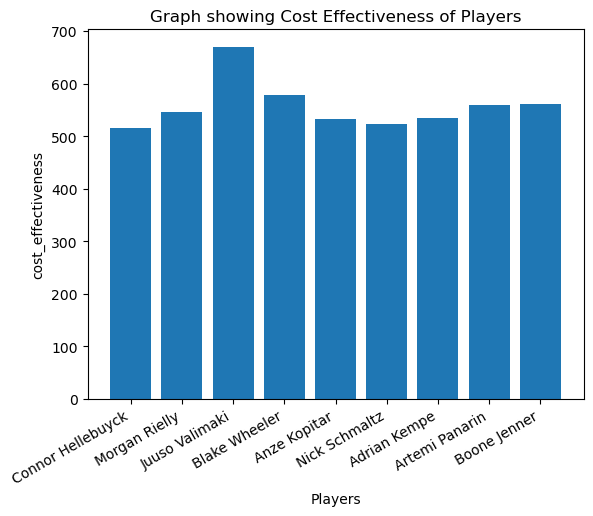

In [1417]:
import matplotlib.pyplot as plt
plt.bar(index, new_merge_gs['cost_effectiveness'])
plt.title('Graph showing Cost Effectiveness of Players')
plt.xlabel('Players')
plt.ylabel('cost_effectiveness')
plt.xticks(rotation=30, ha='right')
plt.show()

#### The bar chart helps analyze the cost effectiveness of the new team. 

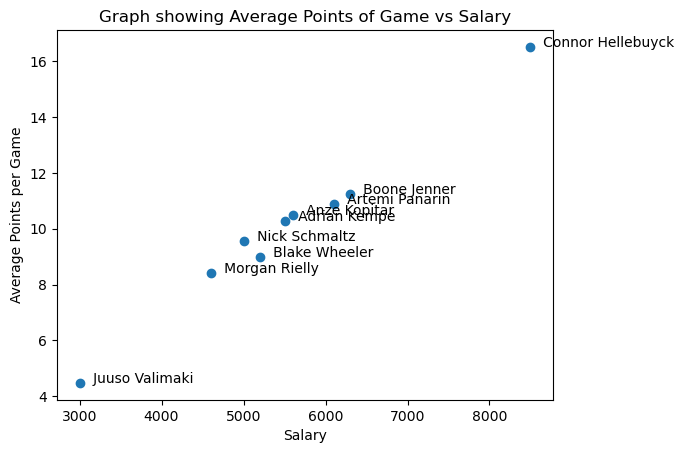

In [1418]:
import matplotlib.pyplot as plt
plt.scatter(new_merge_gs['Salary'], new_merge_gs['AvgPointsPerGame'])

for i, row in new_merge_gs.iterrows():
    plt.annotate('   '+i, (row['Salary'], row['AvgPointsPerGame']))
plt.title('Graph showing Average Points of Game vs Salary')
plt.xlabel('Salary')
plt.ylabel('Average Points per Game')
plt.show()

#### The scatter plot helps understand the relationship between player salaries and their average points per game. This will help in identifying the overpaid and underpaid players in the team. Jusso Valimaki is underpaid and Connor Hellebuyck is overpaid.

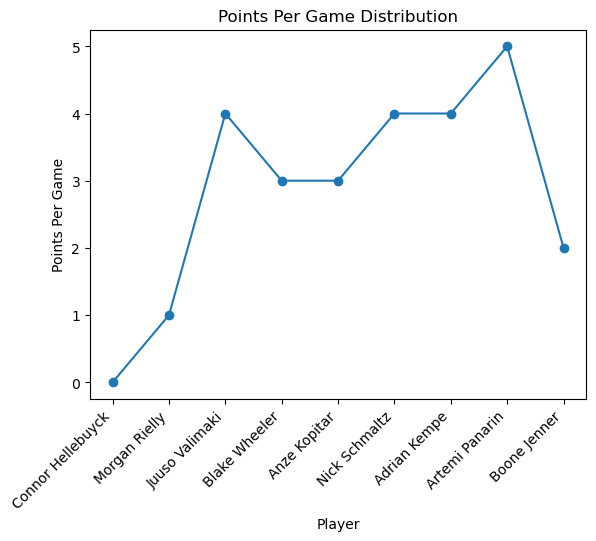

In [1419]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(new_merge_gs.index, new_merge_gs['PGP'], marker="o")
plt.xlabel("Player")
plt.ylabel("Points Per Game")
plt.title("Points Per Game Distribution")
plt.xticks(rotation=45,ha='right')
plt.show()

#### The line chart helps understand the point per game distribution of the players in the team. This will help in identifying the top-performing players in the team. Top performing player is Artemi panarin while low performing player is Connor Hellebuyck

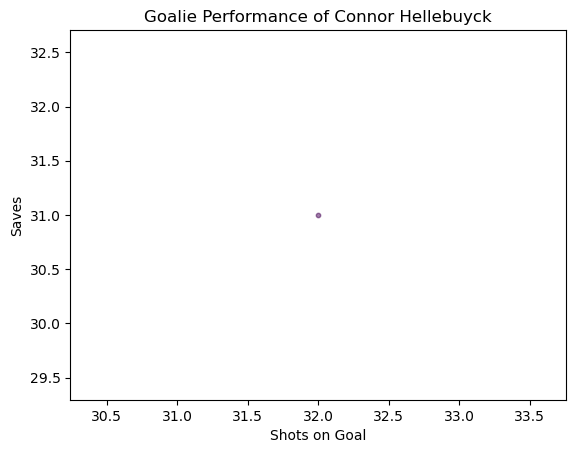

In [1420]:
import matplotlib.pyplot as plt
import pandas as pd

df = new_merge_gs.loc['Connor Hellebuyck']
x = df['SOG']
y = df['SV']
bubble_size = df['GA']
colors = df['W']
plt.scatter(x, y, s=bubble_size*10, c=colors, alpha=0.5)
plt.xlabel('Shots on Goal')
plt.ylabel('Saves')
plt.title('Goalie Performance of Connor Hellebuyck')
plt.show()

#### The bubble chart helps understand the performance of goalies. This will help in identifying the best performing goalies for the team. The size of the buble depends on the Goals scored by the goalie. With Connor Hellebuyck scoring 1 Goal, the bubble looks relatively smaller on the chart. That being said, he seems to have a average Saves to Shots on Goal ratio.

/var/folders/47/bsztlgbn17gc7z69qbc6m59m0000gn/T/ipykernel_46035/3907170118.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=30, ha='right')


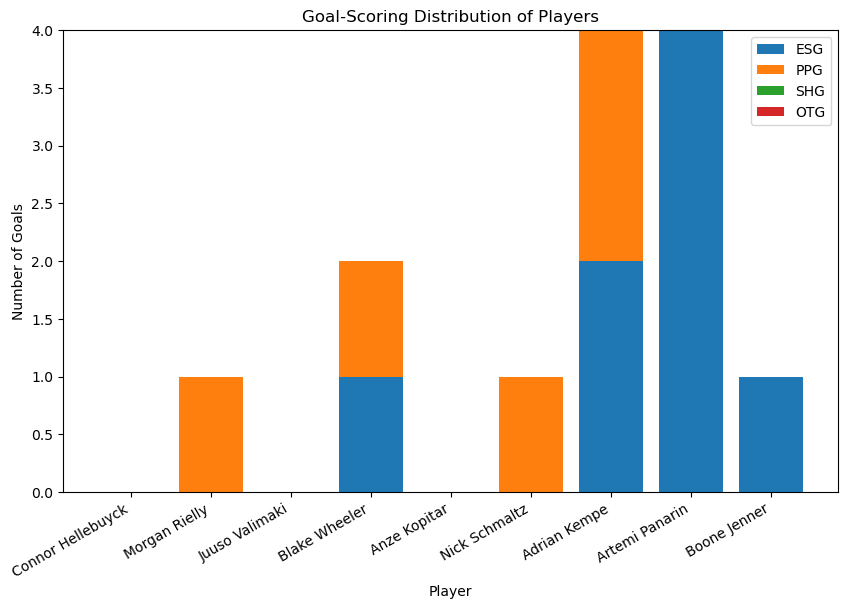

In [1421]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = new_merge_gs

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(df.index, df['ESG'], label='ESG')
ax.bar(df.index, df['PPG'], bottom=df['ESG'], label='PPG')
ax.bar(df.index, df['SHG'], bottom=df['ESG']+df['PPG'], label='SHG')
ax.bar(df.index, df['OTG'], bottom=df['ESG']+df['PPG']+df['SHG'], label='OTG')

# Set labels and title
ax.set_xlabel('Player')
ax.set_ylabel('Number of Goals')
ax.set_title('Goal-Scoring Distribution of Players')
ax.set_xticklabels(df.index, rotation=30, ha='right')
ax.legend()

plt.show()

#### The stacked bar chart helps understand the goal-scoring distribution of the players in the team. This will help in identifying the players with the most goals and their scoring patterns. In the above graph, Connor Hellebuyck is a Goalie, Juuso Valimaki is a Defense and Anze Kopitar is a Center. The graph is based on Even Strength Goals, power play goals, shorthanded goals and overtime (non-shootout) goals. Adrain and Artemi are the best performers. Connor and Jusso didnt score goals.